In [1]:
# pandas, scikitlearn, matplotlib
%pip install pandas scikit-learn matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# read weather.csv
import pandas as pd
df = pd.read_csv('weather.csv')
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [3]:
print(df.shape)
df = df.dropna()
print(df.shape)

(366, 24)
(328, 24)


In [4]:
# get min and max temperature, rains, evaporation, sunshine, wind, humidity, pressure, cloud, temp9am, temp3pm

df = df.drop(['Date', 'Location', 'RainToday'], axis=1) # WindGustDir', 'WindDir9am', 'WindDir3pm', 

df_y = df[['RainTomorrow']]

df_x = df.drop(['RainTomorrow'], axis=1)


df = df

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0,No


In [5]:
# encode WindGustDir', 'WindDir9am', 'WindDir3pm', 
df_x = pd.get_dummies(df_x, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype=float)
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype=float)

In [6]:
df_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


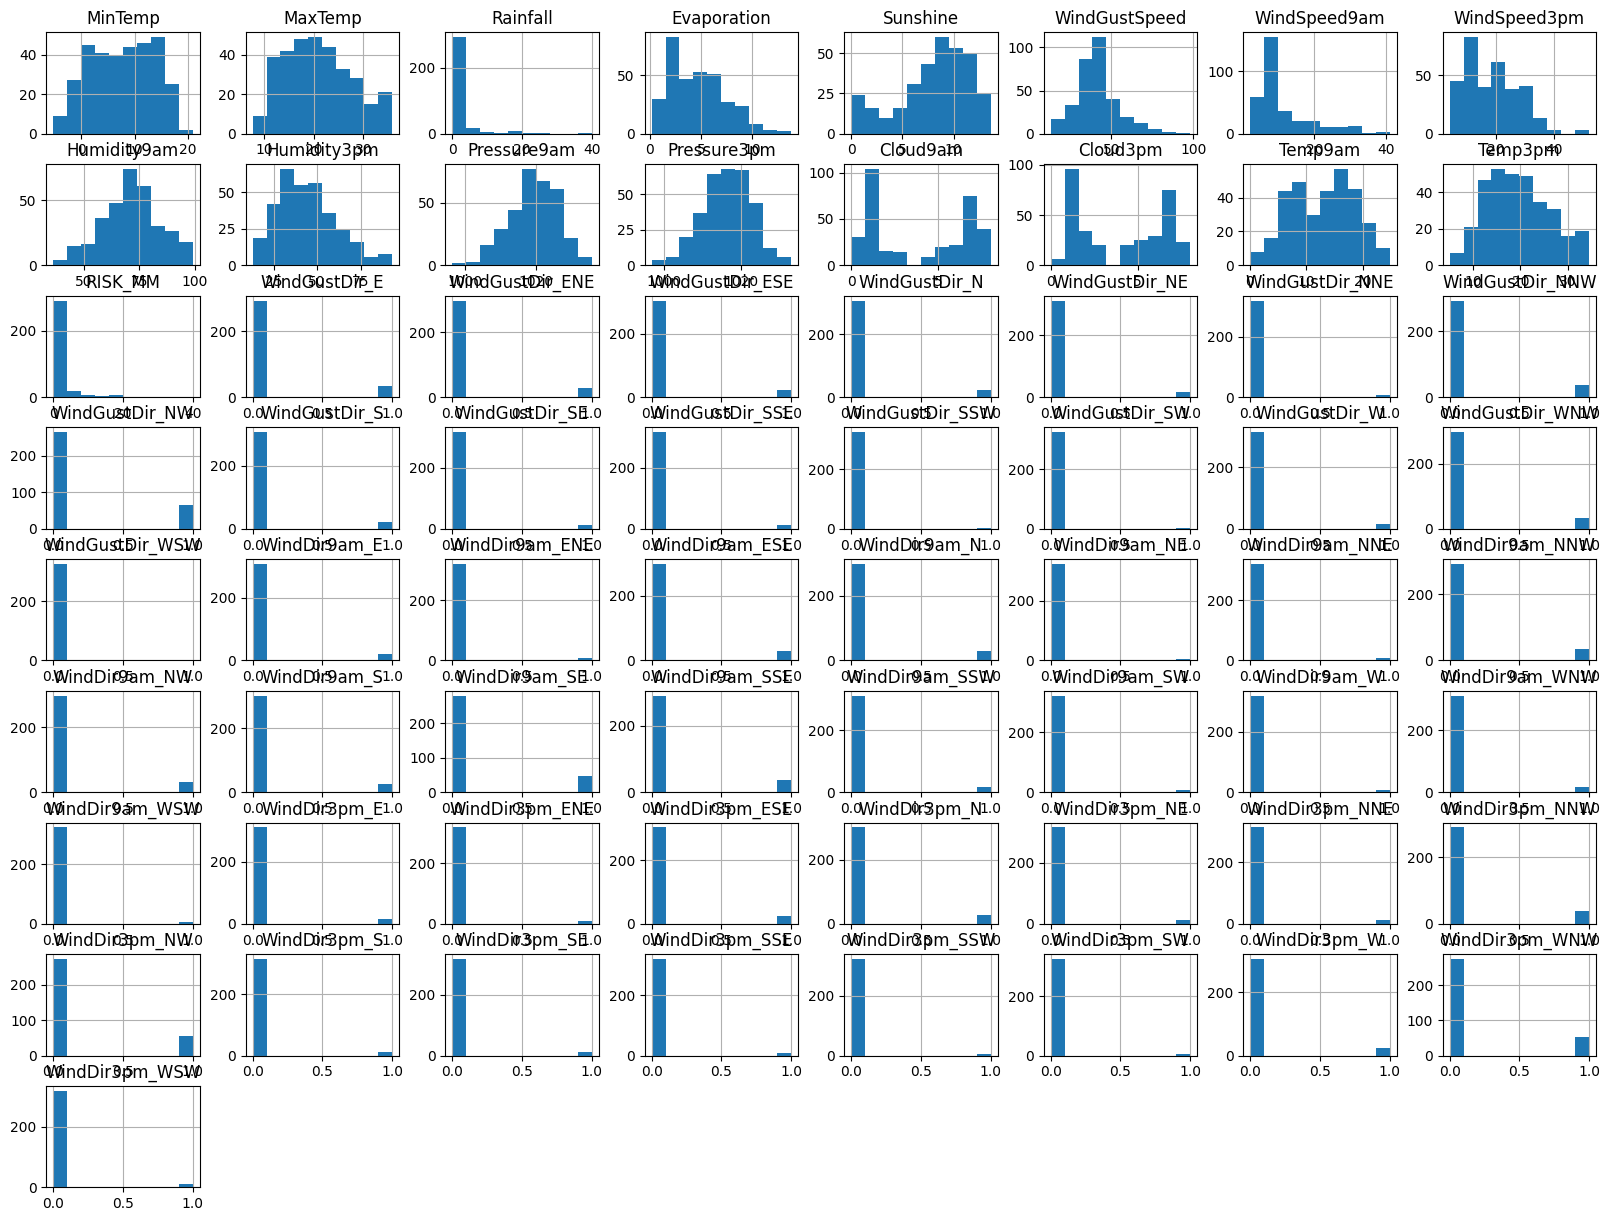

In [7]:
# plot histogram
import matplotlib.pyplot as plt
df.hist(figsize=(20,15))
plt.show()

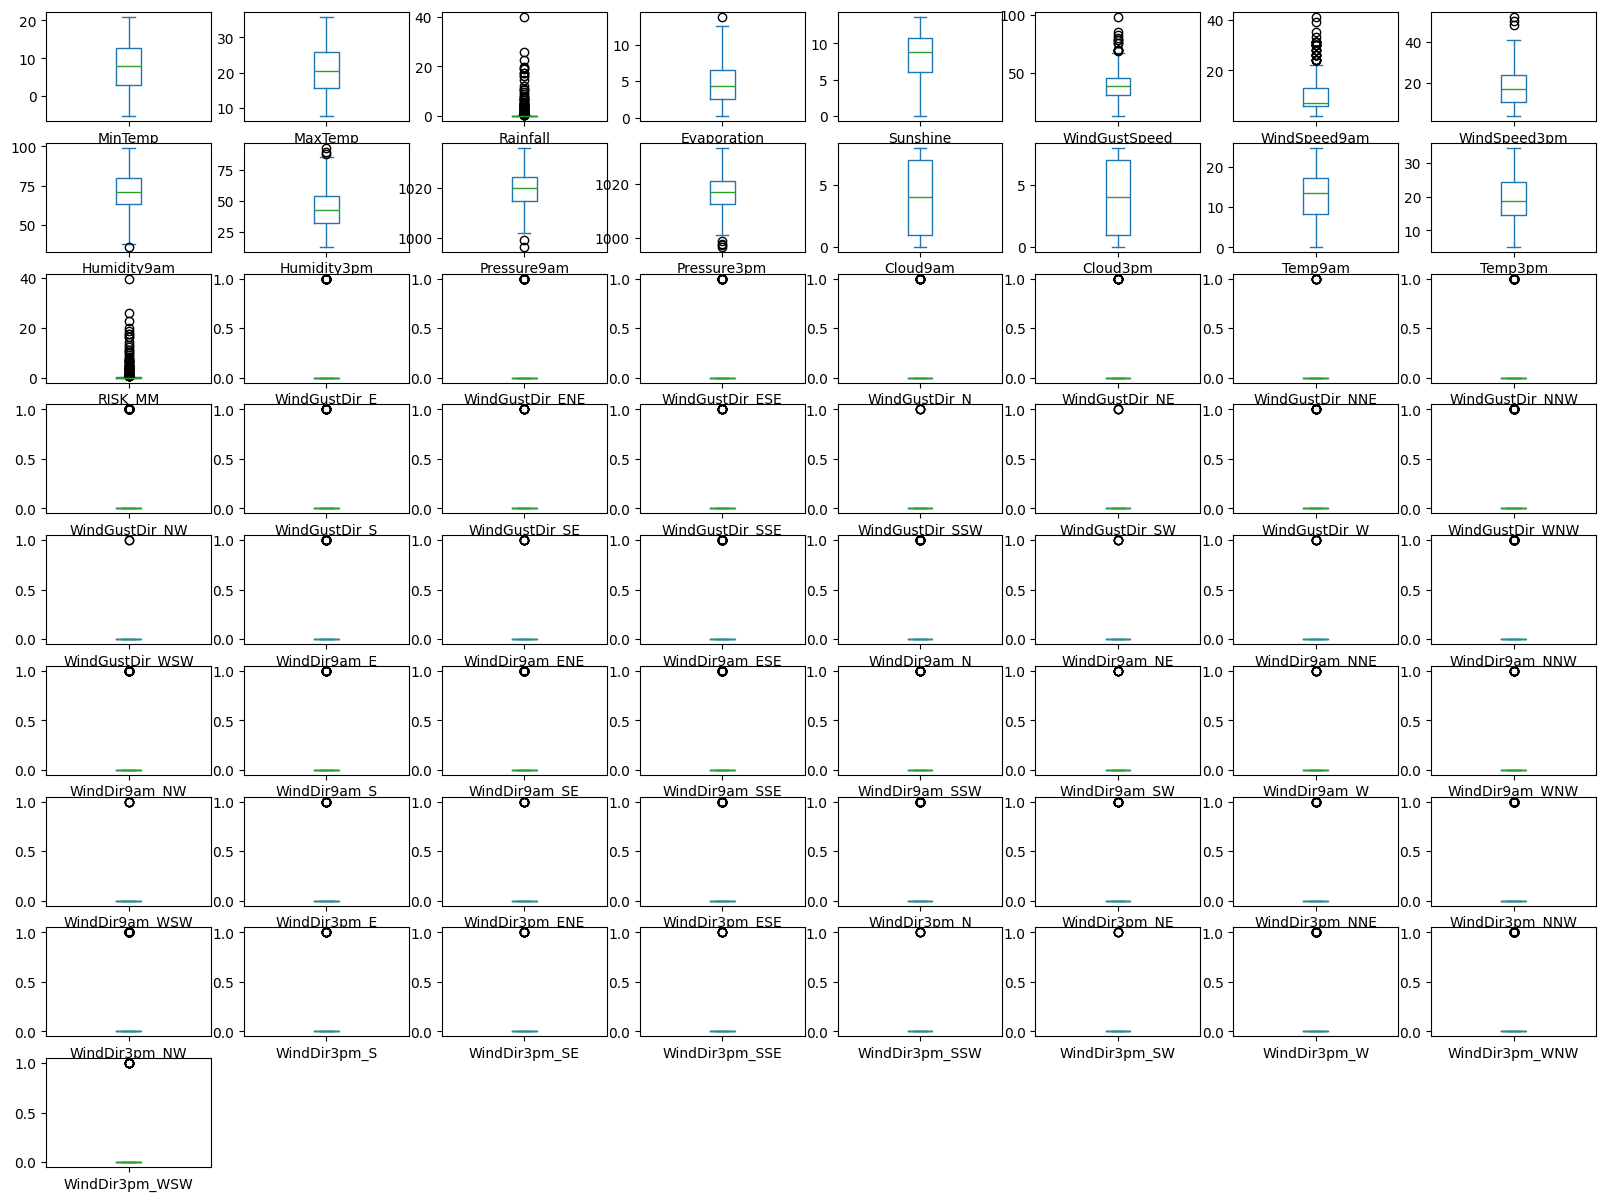

In [12]:
# plot boxplot
df.plot(kind='box', subplots=True, layout=(9, 8), figsize=(20,15))
plt.show()

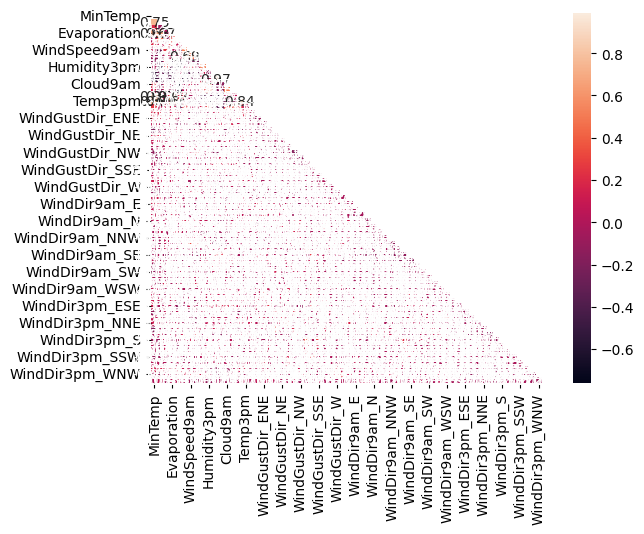

In [13]:
# print correlation matrix
import numpy as np
import seaborn as sns
corr = df_x.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()



In [14]:
# plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,15))
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f3c2c5e7560> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# # plot each feature
# for col in df_x.columns:
#     plt.figure(figsize=(10, 6))
#     plt.title(col)
#     plt.scatter(df_x[col], df_y)
#     plt.show()


In [ ]:
# prepare data for training and testing
# drop rows with missing values


In [15]:
# map yes/no to 1/0 in df_y
df_y = df_y['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_y.head()

0    1
1    1
2    1
3    1
4    0
Name: RainTomorrow, dtype: int64

In [16]:
# wind direction is categorical data, so we need to convert it to numerical data
# use one hot encoding
# df_x = pd.get_dummies(df_x, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
# df_x.head()
df_x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'Win

In [17]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(262, 65) (66, 65) (262,) (66,)


In [18]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(262, 65) (66, 65) (262,) (66,)


In [19]:
## train serveral models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Logistic Regression')
print('Accuracy:', model.score(x_test, y_test))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

Logistic Regression
Accuracy: 0.9242424242424242
Precision: 1.0
Recall: 0.5
F1: 0.6666666666666666
Confusion Matrix:
[[56  0]
 [ 5  5]]



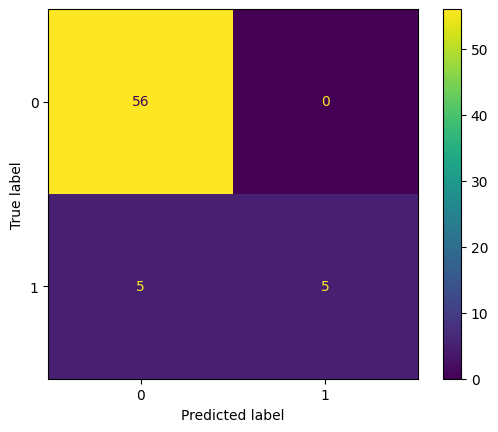

In [20]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


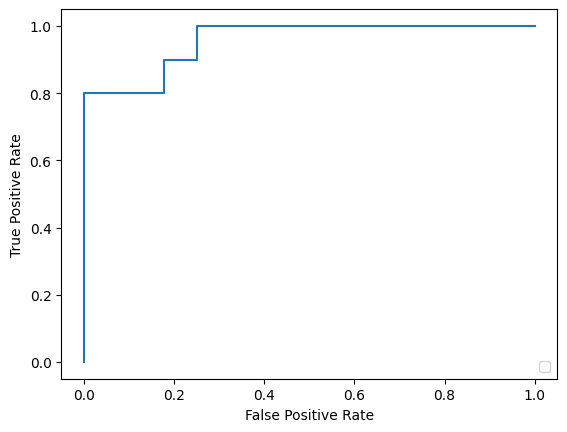

In [22]:
# plot only roc curve
from sklearn.metrics import roc_curve, RocCurveDisplay
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()


AUC: 0.9571428571428572


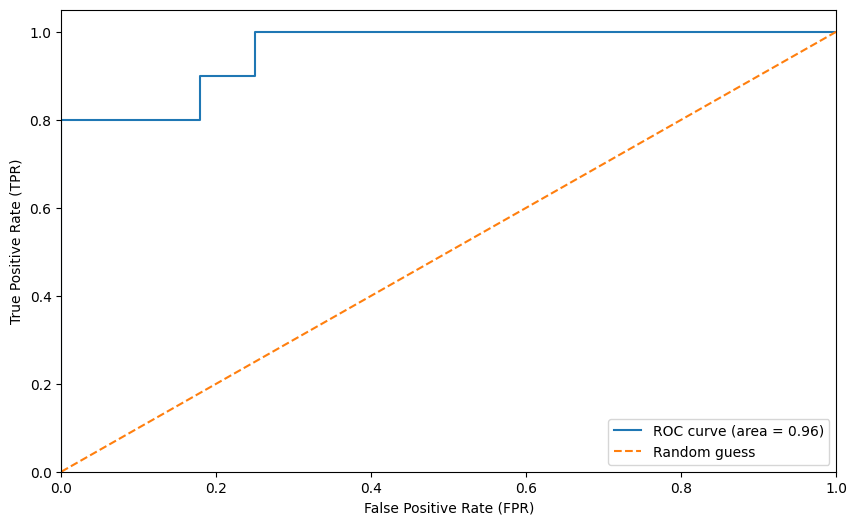

In [25]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], label='Random guess', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
# legend
plt.legend()




In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Decision Tree')
print('Accuracy:', model.score(x_test, y_test))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()

Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion Matrix:
[[56  0]
 [ 0 10]]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


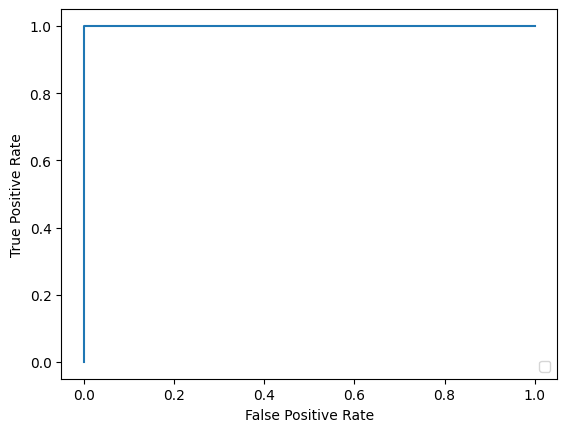

In [27]:
# plot only roc curve
from sklearn.metrics import roc_curve, RocCurveDisplay
y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()
